In [1]:
using Random, Pkg, Distributions, HaltonSequences, Plots, Interact, QuadGK, Plots, FastGaussQuadrature

[ Info: Precompiling HaltonSequences [13907d55-377f-55d6-a9d6-25ac19e11b95]
┌ Warning: Package HaltonSequences does not have Primes in its dependencies:
│ - If you have HaltonSequences checked out for development and have
│   added Primes as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with HaltonSequences
└ Loading Primes into HaltonSequences from project dependency, future warnings for HaltonSequences are suppressed.


WebIO._IJuliaInit()

##  Let's redo the integration problem using QMC:

  \begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}
  
  - Use quasi Monte Carlo method to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw Halton sequence from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different values $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.

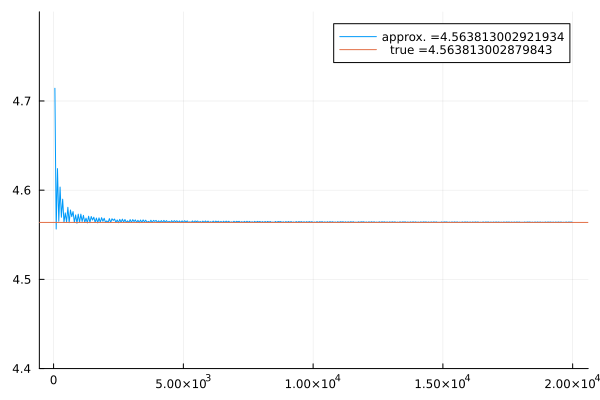

In [2]:
g(x) = exp((-1/3) * (x^2)) * sqrt(1+x^2)
x(t) = (2*t-1) / (t-t^2)                          # variable transformation
J(t) = (2*(t^2)-2*t+1) / ((t^2-t)^2)              # Jacobian
f(t) = g(x(t))*J(t)

#save the result with diff sequence length
every = 50
n_start = every
n_end = 20000
res_Halton = zeros(Int((n_end-n_start)/every) + 1)

#construct Halton sequence
hpt = Halton(2, length=n_end)

for n in n_start:every:n_end                   
    res = sum( f.(hpt[1:n]) ) / n
    res_Halton[Int((n-n_start)/every) + 1] = res
end


n = [n_start:every:n_end;]
plot(n, res_Halton, ylimit=[4.4, 4.8], label="approx. =$(res_Halton[end])") 
hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") |> display

In [3]:
allgrids = Int(n_end/every)

@manipulate for grid in 1:allgrids 
    n1   = n[1:grid]  # the max of grid is allgrids
    res1 = res_Halton[1:grid]
    plot(n1, res1, ylimit=[4.4, 4.8], label="approx. =$(res1[end])")
    hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") 
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["grid"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 400, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(200), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\pupss\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\pupss\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\pupss\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\pupss\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\pupss\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000eb043f0, Task (runnable) @0x000000000eb043f0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\"

## 
Consider the following integration problem:
\begin{align}
  I = \int_a^1 c\cdot x^{-k-1}(1-x)^{k+1}dx.
\end{align}
Assume $a = 10^{-5}$, $c=10^{-9}$, and $k=2$.

### Use both of the Monte Carlo method (with pseudo random numbers) and Quasi-Monte Carlo method (with the Halton sequence) to compute the integral. How long does the sequences need to be in order to have a stable solution (2 digits after the decimal point)? Which method, MC or QMC, uses smaller values of $n$?
- Hint: A very long sequence.
- Hint: The following generates a Halton sequence of length 100 with the base number=2: `using HaltonSequences;` `lds=Halton(2,100)`.

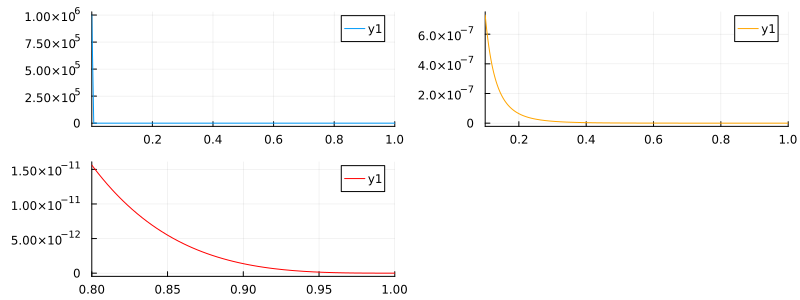

In [4]:
# plot the function

a = 1e-5; c=1e-9; κ = 2;

g(x) = c*x^(-κ-1)*(1-x)^(κ+1)

gp1 = plot(g, xlim=[a, 1])
gp2 = plot(g, xlim=[0.1, 1], color = :orange)
gp3 = plot(g, xlim=[0.8, 1], color = :red)
plot(gp1, gp2, gp3, size=[800, 300])

In [5]:
# Hand-made Gauss-Legendre. Require lots of nodes.

t_rule1(t) = (a+1)/2 + t*(1-a)/2
jac1(t) = (1-a)/2

pb1(t) = g(t_rule1(t))*jac1(t)

xi, wi = gausslegendre(3000)
sum(wi .* pb1.(xi))

4.9997000360203065

In [6]:
# MC, QMC

pt = [50_000_000, 100_000_000, 200_000_000] # number of draws

tran_rule1(t) = a + (1-a)*t
jacobian1(t)  = 1-a
f_1(t) = g(tran_rule1(t))*jacobian1(t)

res_rand   = zeros(length(pt)) # recording results of MC integration based on pseudo random numbers
res_halton = similar(res_rand) # recording results of QMC integration baed on quasi random numbers (LDS)

for i in 1:length(pt)
    mc_rand = rand(pt[i])             # pseudo random numbers
    mc_halton = Halton(length=pt[i])  #  quasi random numbers
    res_rand[i]   = mean(f_1.(mc_rand)) 
    res_halton[i] = mean(f_1.(mc_halton))
end

@show [res_rand res_halton] 

[res_rand res_halton] = [5.356551992284475 5.0074746158654815; 4.7494586573240944 5.004913564224059; 4.898461549862856 5.002833807321924]


3×2 Matrix{Float64}:
 5.35655  5.00747
 4.74946  5.00491
 4.89846  5.00283

In [7]:
# length selection problem

a = 1e-5; c=1e-9; κ = 2;
g(x) = c*x^(-κ-1)*(1-x)^(κ+1)
tran_rule1(t) = a + (1-a)*t
jacobian1(t)  = 1-a
f_1(t) = g(tran_rule1(t))*jacobian1(t)

function Halton_QMCI(; n::AbstractVector, f = f_1)
    res_Halton = zeros(length(n))
    Halton_sequence = Halton(2, length = n[end])
    
    for i in 1:length(n)
        draw = Halton_sequence[1:n[i]]
        res = mean(f_1.(draw))
        res_Halton[i] = res
    end
        
    return res_Halton
end

Halton_QMCI (generic function with 1 method)

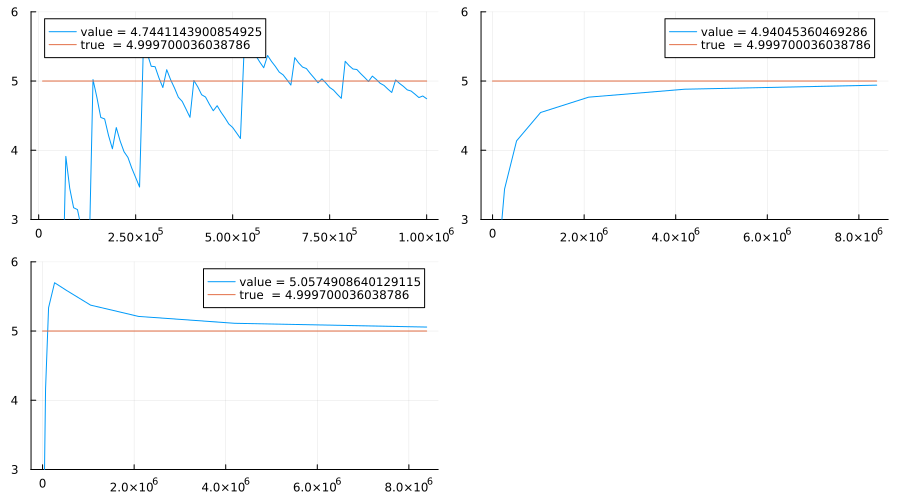

In [8]:
noftrial=23

n_10000 = collect(10_000:10_000:1_000_000)
n_2ⁿ = [(2^i)-1 for i in 1:noftrial]
n_2ⁿ_100 = [(2^i)+100 for i in 1:noftrial]

p1 = plot(n_10000, Halton_QMCI(n = n_10000, f = f_1), ylim = [3,6], label = "value = $(Halton_QMCI(n = n_10000, f = f_1)[end])")
plot!(p1, x -> 4.9997000360203065, label = "true  = 4.999700036038786")

p2 = plot(n_2ⁿ, Halton_QMCI(n = n_2ⁿ, f = f_1), ylim = [3,6], label = "value = $(Halton_QMCI(n = n_2ⁿ, f = f_1)[end])")
plot!(p2, x -> 4.9997000360203065, label = "true  = 4.999700036038786")

p3 = plot(n_2ⁿ_100, Halton_QMCI(n = n_2ⁿ_100, f = f_1), ylim = [3,6], label = "value = $(Halton_QMCI(n = n_2ⁿ_100, f = f_1)[end])")
plot!(p3, x -> 4.9997000360203065, label = "true  = 4.999700036038786")

plot(p1, p2, p3, size=[900, 500])

### Julia provides a package `QuadGK.jl` which has a function `quadgk()` that uses *adaptive quadratures* to do one-dimensional numerical integration. Use `using Pkg; Pkg.add("QuadGK.jl")` to install it, and `using QuadGK` to call it.
- Please read Section 1.3 on `Lec4 Numerical Integration - class.ipynb` to understand what is adaptive quadratures.
- Use `quadgk()` function to compute the integration.

In [9]:
# Adaptive Gauss-Kronrod using QuadGK.Results look stable.

mytol = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10] # experiment with tolerance

res1=zeros(length(mytol))
for i in 1:length(mytol)
  res1[i] = quadgk(g, a, 1, rtol=mytol[i])[1]
end

res1

6-element Vector{Float64}:
 4.999700036038812
 4.999700036038812
 4.999700036038788
 4.999700036038788
 4.999700036038788
 4.999700036038786

## Important sampling

plot(graph1, graph2, graph3, size = [800, 300]) = Plot{Plots.GRBackend() n=6}


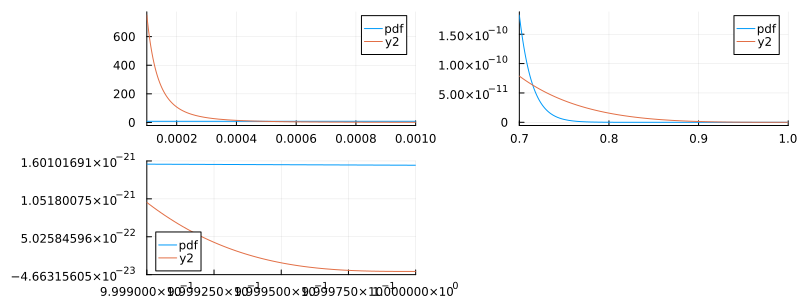

In [10]:
# imporant sampling

# target function
a = 1e-5; c=1e-9; κ = 2;

g(x) = c*x^(-κ-1)*(1-x)^(κ+1)
tran_rule1(t) = a + (1-a)*t
jacobian1(t)  = 1-a
f_1(t) = g(tran_rule1(t))*jacobian1(t)

# propose pdf
dist = Truncated(Normal(0, 0.1), 0, 1)
h(x) = pdf(dist,x)

# plot the function 
graph1 = plot( h, xlim = [0.0001, 0.001], label = "pdf")
plot!(graph1, f_1)
graph2 = plot( h, xlim = [0.7, 1], label = "pdf")
plot!(graph2, f_1)
graph3 = plot( h, xlim = [0.9999, 1], label = "pdf")
plot!(graph3, f_1)

@show plot(graph1, graph2, graph3, size=[800, 300])

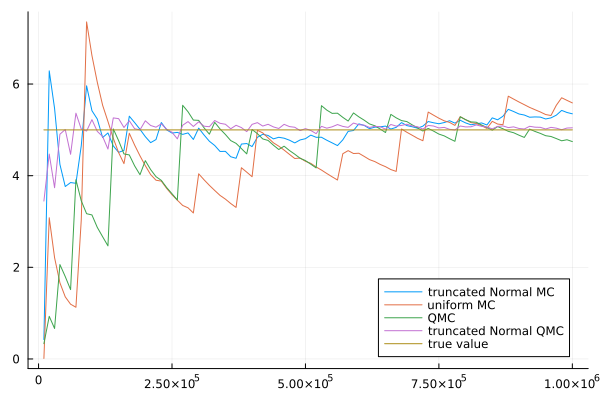

In [11]:
# MCI
obj(x) = f_1(x)/pdf(dist,x)

n_list = collect(10_000:10_000:1_000_000)

res_important = zeros(length(n_list))
res_uniform   = similar(res_important)
res_halton    = similar(res_important)
res_halton_important = similar(res_important)

unform_seq = rand(Xoshiro(123), n_list[end])
halton_seq = Halton(2, length = n_list[end])

for i in 1:length(n_list)
    n = n_list[i]
    
    draw = unform_seq[1:n]
    draw_important = quantile(dist, draw)
    draw_halton = halton_seq[1:n]
    draw_important_halton = quantile(dist, draw_halton)
    
    res_uniform[i]   = mean(f_1.(draw))  
    res_important[i] = mean(obj.(draw_important))
    res_halton[i]    = mean(f_1.(draw_halton))
    res_halton_important[i] = mean(obj.(draw_important_halton))
end

plot(n_list, res_important, label = "truncated Normal MC")
plot!(n_list, res_uniform, label = "uniform MC")
plot!(n_list, res_halton, label = "QMC")
plot!(n_list, res_halton_important, label = "truncated Normal QMC")
plot!(x -> 4.999700036038786, label = "true value")

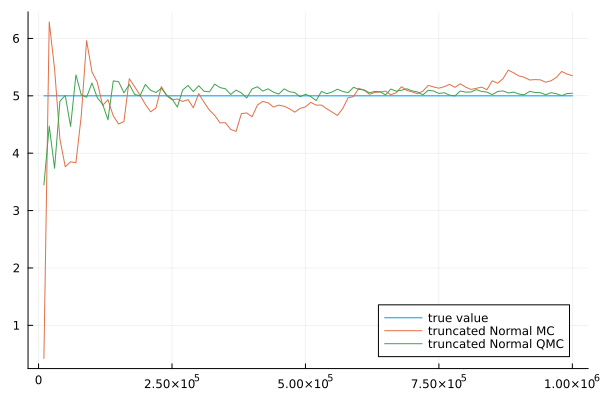

In [20]:
plot(n_list, x -> 4.999700036038786, label = "true value")
#plot!(n_list, res_uniform, label = "uniform MC")
plot!(n_list, res_important, label = "truncated Normal MC")
#plot!(n_list, res_halton, label = "QMC")
plot!(n_list, res_halton_important, label = "truncated Normal QMC")
